**A1.4A.19** - Does the system support automated A/B testing and sensitivity analysis?

In this second part of two notebooks, we concentrate on the sensitivity analysis.


# Sensitivity Analysis

Sensitivity analysis in the context of a trained model is a technique used to determine how different values of an independent variable or model parameters affect the output or prediction of the model.

This Jupyter notebook performs a sensitivity analysis of a simple linear regression model. The code generates a set of random data points and fits a linear regression model to it. It then alters the coefficient (β1) of the model within a specified range and calculates the Mean Squared Error (MSE) of the model predictions against the actual values for each changed coefficient value.

The formula for the simple linear regression is y = β0 + β1*X + ε, where:
- y is the dependent variable,
- X is the independent variable,
- β0 (model.intercept_) is the y-intercept,
- β1 (model.coef_) is the coefficient of X,
- ε is the error term.

Here, `model.coef_` corresponds to β1, the coefficient of the independent variable, and `model.intercept_` corresponds to β0, the y-intercept.

After changing the model's coefficient (β1) within a range, the MSE is calculated for the model's predictions. The MSE for each coefficient value is then plotted against the corresponding coefficient value, providing a visualization of the sensitivity of the model's error to changes in the coefficient.

Trained Model (β1, β0):  [[2.46846751]] [12.22151077]


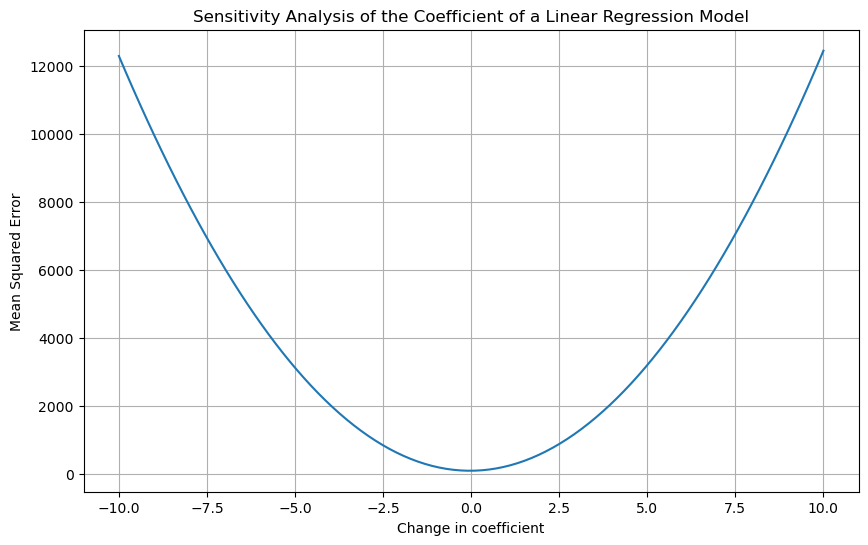

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generating random data
np.random.seed(0)
X = np.random.rand(100, 1) * 20
y = 2.5 * X + 10 + np.random.randn(100, 1) * 10

# Fitting a linear regression model
model = LinearRegression()
model.fit(X, y)

print("Trained Model (β1, β0): ", model.coef_,model.intercept_)

# Defining a range for the sensitivity analysis
sensitivity_range = np.linspace(-10, 10, 100)

# # Store the results of the model predictions
results = []

for change in sensitivity_range:
    # Changing the model coefficients
    model.coef_ = np.array([[2.5 + change]])
    
    # Making predictions
    predictions = model.predict(X)
    
    # Calculate the mean squared error
    mse = np.mean((y - predictions)**2)
    
    # Append the results
    results.append(mse)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sensitivity_range, results)
plt.xlabel('Change in coefficient')
plt.ylabel('Mean Squared Error')
plt.title('Sensitivity Analysis of the Coefficient of a Linear Regression Model')
plt.grid(True)
plt.show()
